In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/imdb-100000-moviestvshows/contentDataGenre.csv
/kaggle/input/imdb-100000-moviestvshows/contentDataRegion.csv
/kaggle/input/imdb-100000-moviestvshows/contentDataPrime.csv


In [3]:
df1 = pd.read_csv('/kaggle/input/imdb-100000-moviestvshows/contentDataGenre.csv')
df2 = pd.read_csv('/kaggle/input/imdb-100000-moviestvshows/contentDataRegion.csv')
df3 = pd.read_csv('/kaggle/input/imdb-100000-moviestvshows/contentDataPrime.csv')

In [4]:
df1.head()

,dataId,genre
0,102795,Drama
1,102796,Documentary
2,102796,Comedy
3,102797,Documentary
4,102797,Horror


In [5]:
df2.head()

,dataId,region
0,102795,India
1,102796,United States
2,102797,United States
3,102798,United States
4,102799,United Kingdom


In [6]:
df3.head()

,dataId,contentType,title,length,releaseYear,endYear,votes,rating,gross,certificate,description
0,102795,movie,Ratha Kanneer,154,1954,-1,349,8.5,-1,NaN,"The story revolves around Mohanasundaram, a re..."
1,102796,movie,All Star Comedy Jam,89,-1,-1,349,7.5,-1,Not Rated,The Original King of Comedy and Shaquille O'Ne...
2,102797,movie,Faces of Death: Fact or Fiction?,54,-1,-1,349,2.9,-1,Unrated,Add a Plot\n
3,102798,movie,Don't Look,71,2018,-1,349,2.8,-1,NaN,"In the tradition of classic horror movies, ""Do..."
4,102799,movie,The Escape from Auschwitz,80,2020,-1,349,1.7,-1,TV-MA,After capturing Kazimierz Piechowski at the Hu...


## Data Cleaning

In [7]:
# Check duplicate values for dataset 1
df_dup1 = df1.duplicated('dataId', keep = False)
df_dup1.value_counts()

True     191655
False     27558
dtype: int64

In [8]:
# Delete duplicates from dataset 1
df1 = df1.drop_duplicates(subset='dataId')

In [9]:
# Check duplicate values for dataset 2
df_dup2 = df2.duplicated('dataId', keep = False)
df_dup2.value_counts()

False    84665
True     43267
dtype: int64

In [10]:
# Delete duplicates from dataset 2
df2 = df2.drop_duplicates(subset ='dataId')

In [11]:
# Check null values for dataset 3
df3.isna().sum()

dataId             0
contentType        0
title              0
length             0
releaseYear        0
endYear            0
votes              0
rating             0
gross              0
certificate    43248
description        0
dtype: int64

In [12]:
# Drop unsused columns
df3 = df3.drop(columns = ['description', 'certificate', 'gross', 'endYear'])

`gross` and `endYear` columns contain 86956 and 91337 of '-1'. Since '-1' represent the missing values, we're dropping the columns from the dataset.

In [13]:
# Check duplicate values for dataset 3
df_dup3 = df3.duplicated('dataId', keep = False)
df_dup3.value_counts()

False    101602
True          4
dtype: int64

In [14]:
# Delete duplicates from dataset 3
df3 = df3.drop_duplicates(subset ='dataId')

## Merging Datasets

In [15]:
# Merge all the datasets into one
merged_df = pd.merge(df3, df1,how='inner', on='dataId')
df = pd.merge(merged_df, df2, how = 'inner', on='dataId')

In [16]:
df.head()

,dataId,contentType,title,length,releaseYear,votes,rating,genre,region
0,102795,movie,Ratha Kanneer,154,1954,349,8.5,Drama,India
1,102796,movie,All Star Comedy Jam,89,-1,349,7.5,Documentary,United States
2,102797,movie,Faces of Death: Fact or Fiction?,54,-1,349,2.9,Documentary,United States
3,102798,movie,Don't Look,71,2018,349,2.8,Horror,United States
4,102799,movie,The Escape from Auschwitz,80,2020,349,1.7,Drama,United Kingdom


In [17]:
df.describe()

,dataId,releaseYear,votes,rating
count,101604.000000,101604.000000,1.016040e+05,101604.000000
mean,52149.573540,1877.733514,1.132212e+04,6.361964
std,29761.746755,479.017524,6.084955e+04,1.315032
min,0.000000,-1.000000,-1.000000e+00,1.000000
25%,26503.750000,1984.000000,4.550000e+02,5.700000
50%,52491.500000,2007.000000,9.520000e+02,6.500000
75%,77892.250000,2016.000000,3.097000e+03,7.300000
max,103293.000000,2023.000000,2.715939e+06,10.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101604 entries, 0 to 101603
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dataId       101604 non-null  int64  
 1   contentType  101604 non-null  object 
 2   title        101604 non-null  object 
 3   length       101604 non-null  object 
 4   releaseYear  101604 non-null  int64  
 5   votes        101604 non-null  int64  
 6   rating       101604 non-null  float64
 7   genre        101604 non-null  object 
 8   region       101604 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 7.8+ MB


## Exploratory Data Analysis

In [19]:
# Set default values for the graph plot
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 6)
matplotlib.rcParams['figure.dpi'] = 150
matplotlib.rcParams['figure.facecolor'] = '#00000000'
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

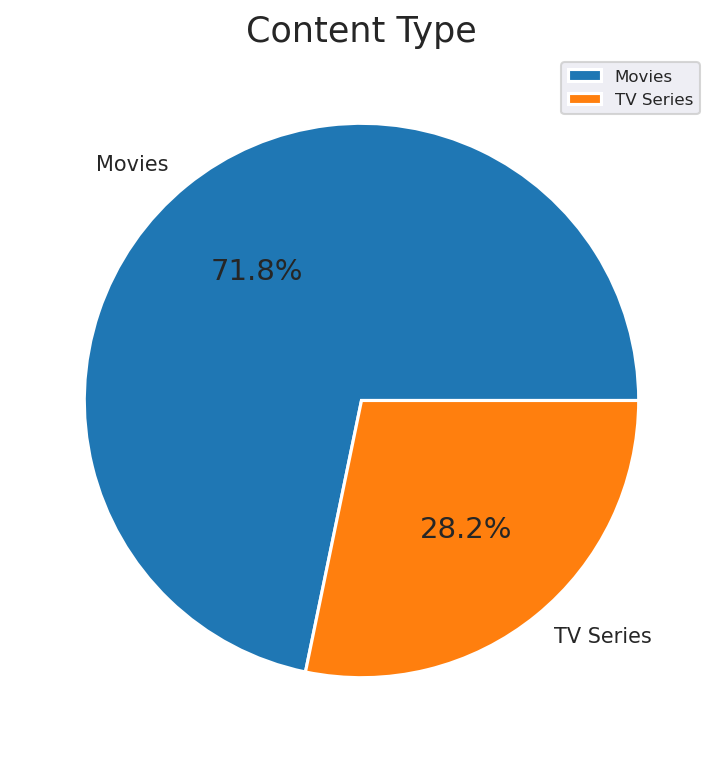

In [20]:
content_df =  df.groupby('contentType', as_index = False)['dataId'].count()
new_labels = ['Movies', 'TV Series']
plt.pie('dataId', labels = new_labels, data = content_df, autopct = '%1.1f%%', wedgeprops={'linewidth': 1.5, 'edgecolor': 'white'})
plt.legend(labels = new_labels, loc = 'best', fontsize = 8)
plt.title('Content Type');

Movies make up the majority of the chart at 71.8%, while TV shows account for 28.2%.

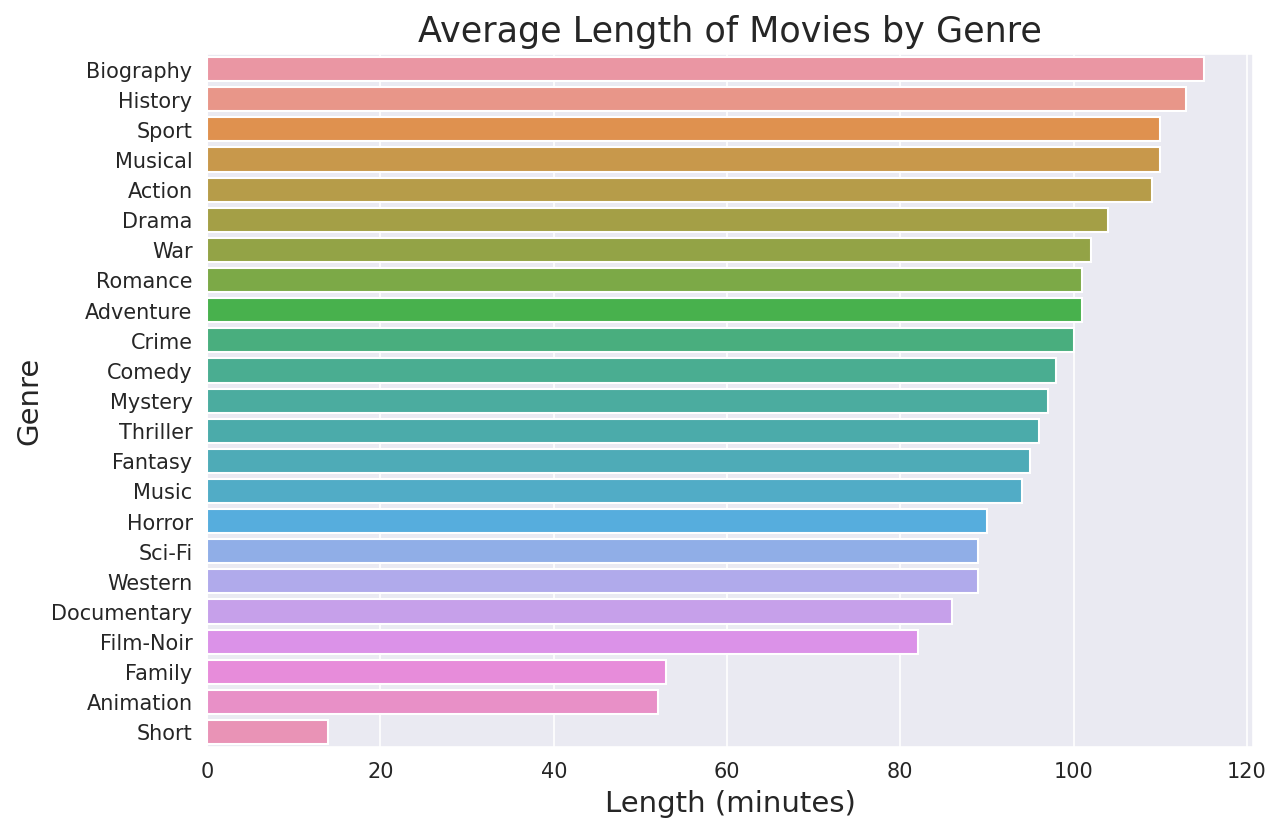

In [21]:
df['length'] = pd.to_numeric(df['length'], errors='coerce')

length_df = df.groupby(['genre', 'contentType'], as_index = False)['length'].mean().round().sort_values('length', ascending=False)
length_df = length_df[(length_df['genre'].isin(['n']) == False) & (length_df['length'].isin([-1]) == False)]

ax = sns.barplot(x = 'length', y = 'genre', data = length_df[length_df['contentType'] == 'movie'])
ax.set_xlabel('Length (minutes)')
ax.set_ylabel('Genre')
ax.set_title('Average Length of Movies by Genre')

plt.subplots_adjust(wspace=0.5);

Note: This analysis only includes movies and excludes TV series. This is because the data does not specify if the length of TV series is per episode or for the whole series. Without this information, it is hard to compare the average length of TV series and movies accurately. Therefore, to avoid presenting potentially inaccurate results, we have chosen to only include movies in our analysis.

If we are able to find more information on this in the future, we will update the graph accordingly.

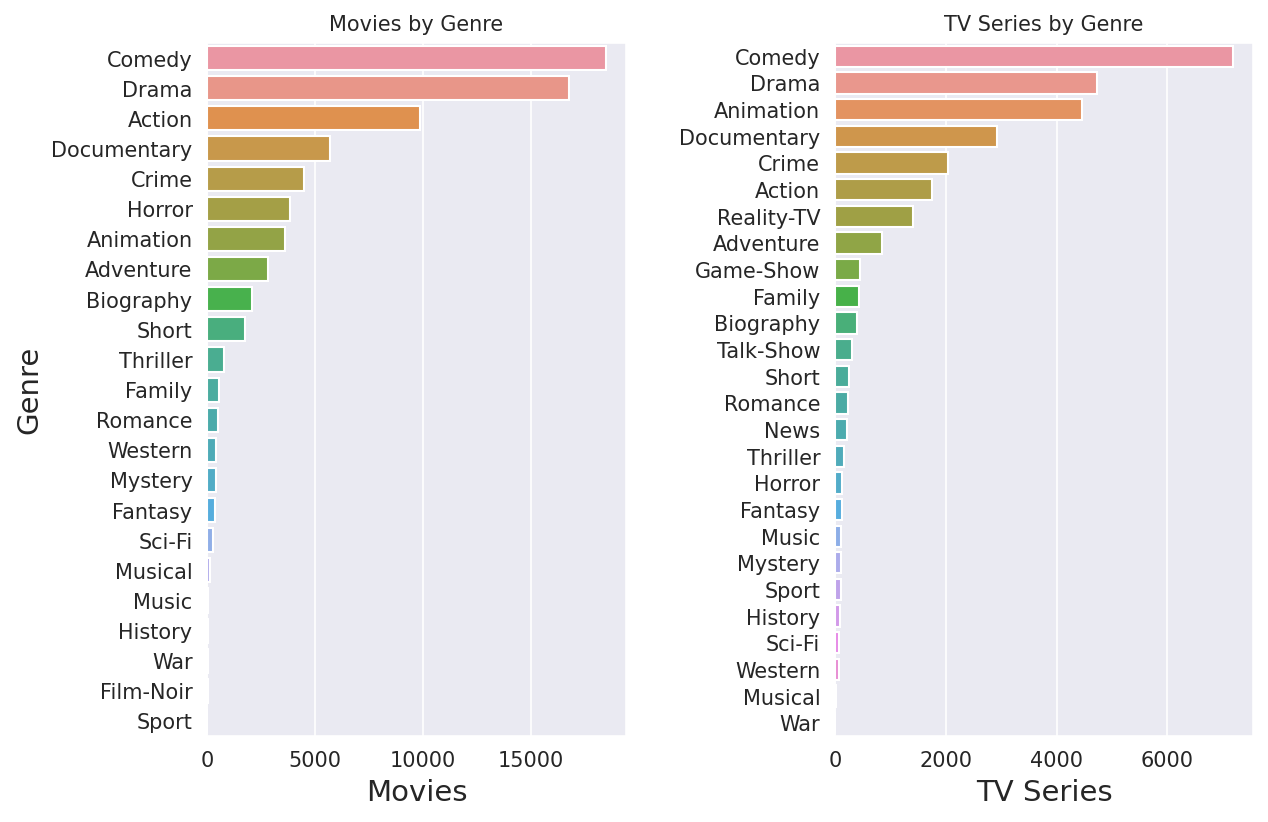

In [22]:
genre_df = df.groupby(['genre','contentType'], as_index= False)['dataId'].count().sort_values('dataId', ascending =False)
genre_df = genre_df[(genre_df['genre'].isin(['n']) == False)]
fig, (ax1,ax2) = plt.subplots(1,2)

# Left graph
sns.barplot(x = 'dataId', y = 'genre', data = genre_df[genre_df['contentType'] == 'movie'], ax = ax1)
ax1.set_xlabel('Movies')
ax1.set_ylabel('Genre')
ax1.set_title('Movies by Genre', fontsize = 10)

# Right graph
sns.barplot(x = 'dataId', y = 'genre', data = genre_df[genre_df['contentType'] == 'tvSeries'], ax = ax2)
ax2.set_xlabel('TV Series')
ax2.set_ylabel('')
ax2.set_title('TV Series by Genre', fontsize = 10)

plt.subplots_adjust(wspace=0.5);

When it comes to movies and TV shows, comedy and drama rule the screen. But what else do people like to watch? Well, movies fans enjoy some action-packed thrillers, while TV lovers prefer some animated fun. Documentary and crime are also among the top five genres for both movies and TV series, appealing to those who want to learn something new or solve a mystery.

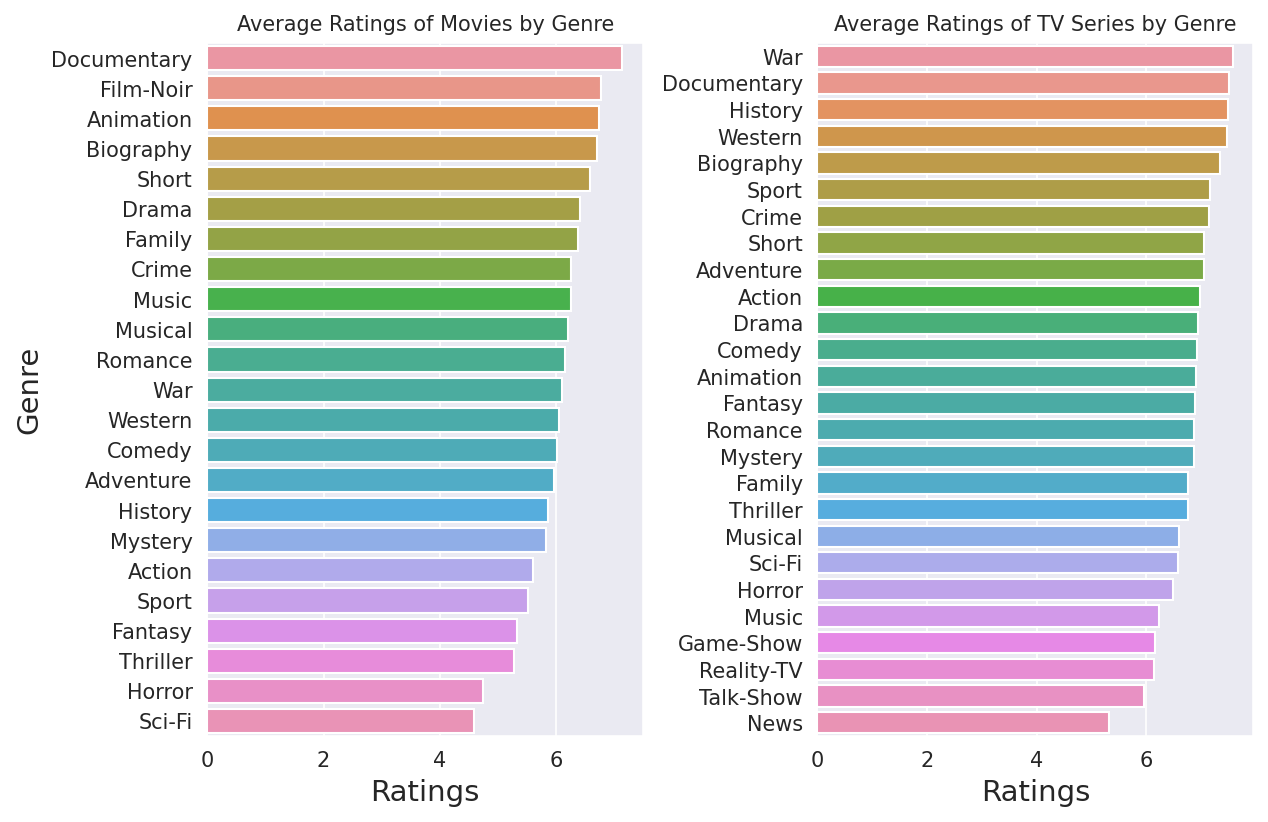

In [23]:
avg_rating_df = df.groupby(['genre', 'contentType'], as_index = False)['rating'].mean().sort_values('rating', ascending=False)
avg_rating_df = avg_rating_df[(avg_rating_df['genre'].isin(['n']) == False)]

fig, (ax1, ax2) = plt.subplots(1,2)

# Left graph
sns.barplot(x = 'rating', y = 'genre', data = avg_rating_df[avg_rating_df['contentType'] == 'movie'], ax = ax1)
ax1.set_xlabel('Ratings')
ax1.set_ylabel('Genre')
ax1.set_title('Average Ratings of Movies by Genre', fontsize = 10)

# Right graph
sns.barplot(x = 'rating', y = 'genre', data = avg_rating_df[avg_rating_df['contentType'] == 'tvSeries'], ax = ax2)
ax2.set_xlabel('Ratings')
ax2.set_ylabel('')
ax2.set_title('Average Ratings of TV Series by Genre', fontsize = 10)

plt.subplots_adjust(wspace=0.4);

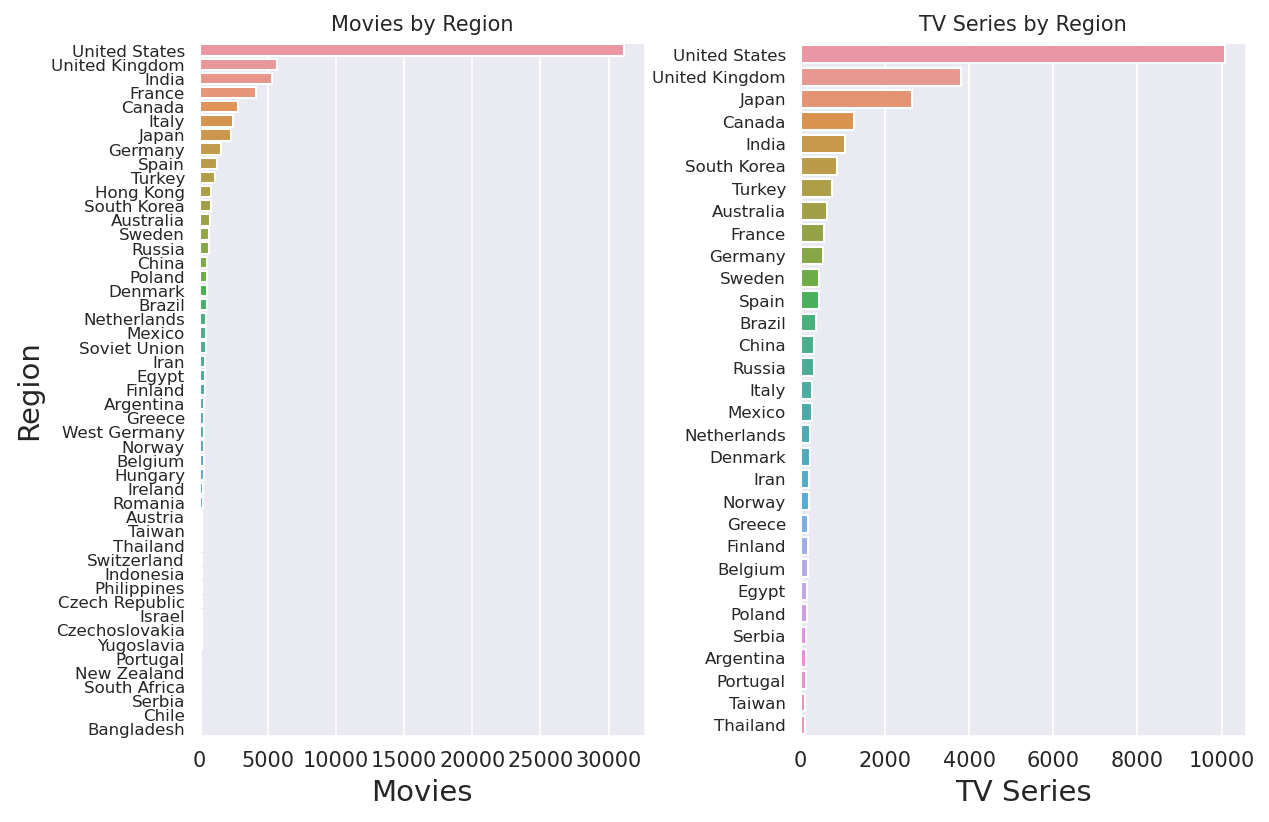

In [24]:
region_df =df.groupby(['region','contentType'], as_index = False)['dataId'].count().sort_values('dataId', ascending = False)
region_df = region_df[(region_df['dataId'] >= 100) & (region_df['region'] != 'n')]

fig , (ax1, ax2) = plt.subplots(1,2)

# Left graph
sns.barplot(x = 'dataId', y = 'region', data = region_df[region_df['contentType']=='movie'], ax = ax1)
ax1.set_xlabel('Movies')
ax1.set_ylabel('Region')
ax1.set_title('Movies by Region', fontsize = 10)
ax1.tick_params(axis='y', labelsize=8)

# Right graph
sns.barplot(x = 'dataId', y = 'region', data = region_df[region_df['contentType']=='tvSeries'], ax = ax2)
ax2.set_xlabel('TV Series')
ax2.set_ylabel('')
ax2.set_title('TV Series by Region', fontsize = 10)
ax2.tick_params(axis='y', labelsize=8)

plt.subplots_adjust(wspace=0.35);

The number of movies and TV series varies across different countries. For example, the US produces more movies (31,110) than TV series (10,068), while South Korea and Japan has more TV series (857 and 2651) than movies (810 and 2289). The UK TV series (3,807 respectively) than movies (5,711 respectively). India, on the other hand, has more movies (5,310) than TV series (1,066).

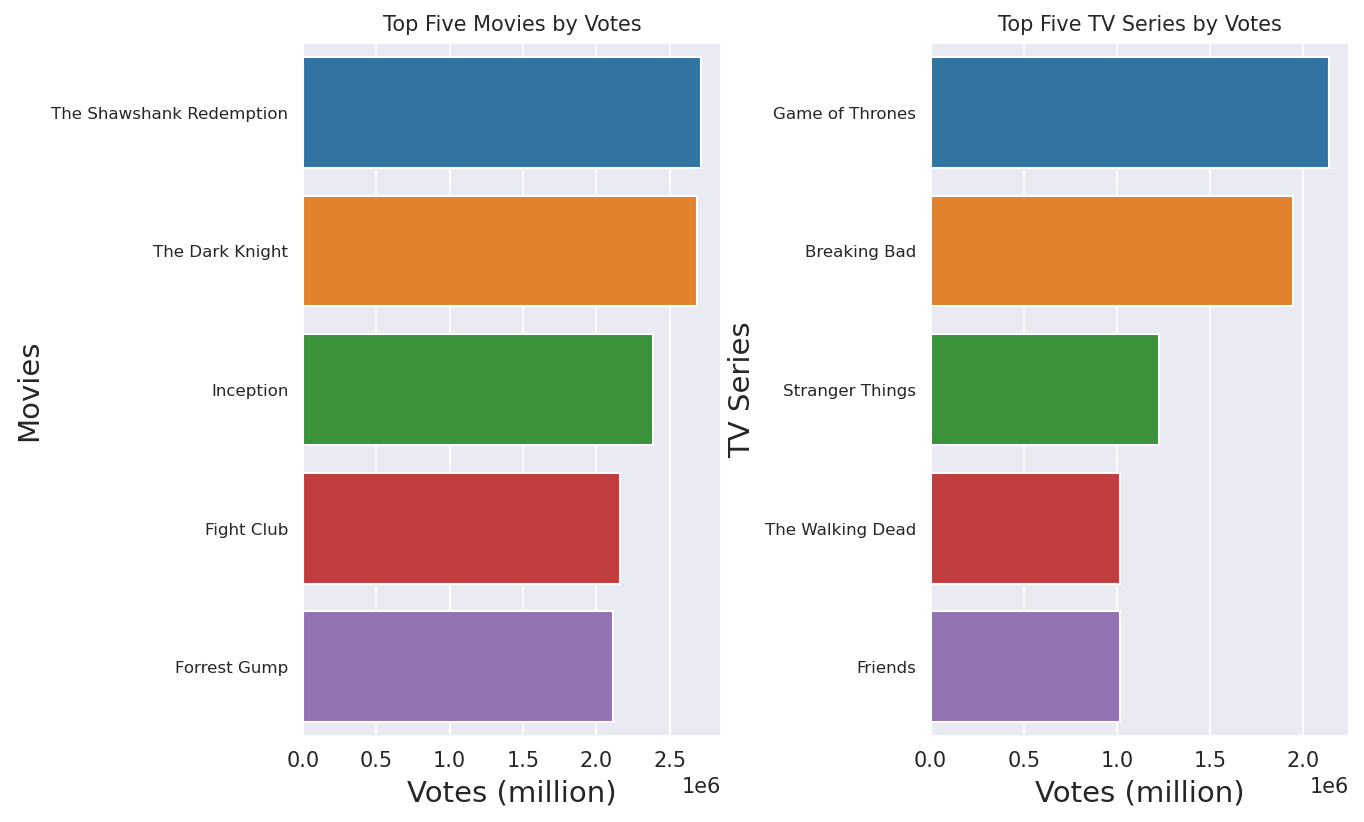

In [25]:
high_rating_df= df[(df['rating'] >= 8)].sort_values(['votes', 'rating'], ascending = False)
top_movies_df = high_rating_df[high_rating_df['contentType'] == 'movie'][:5]
top_tvseries_df = high_rating_df[high_rating_df['contentType'] == 'tvSeries'][:5]

fig, (ax1, ax2) = plt.subplots(1, 2)

# Left graph
sns.barplot(x = 'votes', y = 'title', data = top_movies_df, ax = ax1 )
ax1.tick_params(axis='y', labelsize=8)
ax1.set_xlabel('Votes (million)')
ax1.set_ylabel('Movies')
ax1.set_title('Top Five Movies by Votes', fontsize = 10)

# Right graph
sns.barplot(x = 'votes', y = 'title', data = top_tvseries_df, ax = ax2 )
ax2.set_xlabel('Votes (million)')
ax2.set_ylabel('TV Series')
ax2.tick_params(axis='y', labelsize=8)
ax2.set_title('Top Five TV Series by Votes', fontsize = 10)

plt.subplots_adjust(wspace = 0.5);

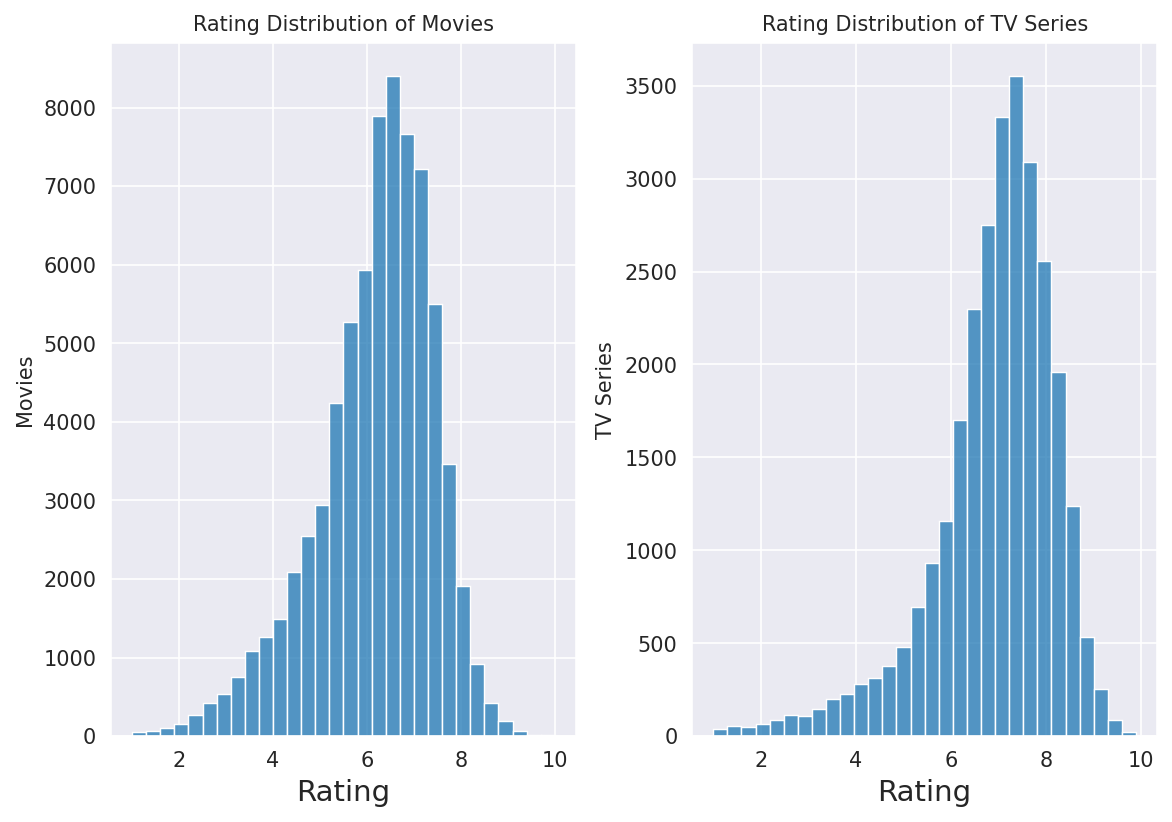

In [26]:
fig, (ax1, ax2) = plt.subplots(1,2) 

# Left graph
sns.histplot(x='rating', data=df[df['contentType'] == 'movie'], ax=ax1, bins = 30)
ax1.set_title('Rating Distribution of Movies', fontsize = 10)
ax1.set_xlabel('Rating')
ax1.set_ylabel('Movies', fontsize = 10)

# Right graph
sns.histplot(x='rating', data=df[df['contentType'] == 'tvSeries'], ax=ax2, bins = 30)
ax2.set_title('Rating Distribution of TV Series', fontsize = 10)
ax2.set_xlabel('Rating')
ax2.set_ylabel('TV Series', fontsize = 10)

plt.subplots_adjust(wspace=0.25);

TV series have a higher mean rating (6.94) than movies (6.14) on IMDB. About 20% of TV series and 4% of movies are rated 8 or more.
One reason is that TV series have more time to develop their characters and storylines, which can result in more nuanced and engaging content. Additionally, TV series may have fewer rating restrictions than movies, allowing them to explore darker and grittier themes that can appeal to audiences.

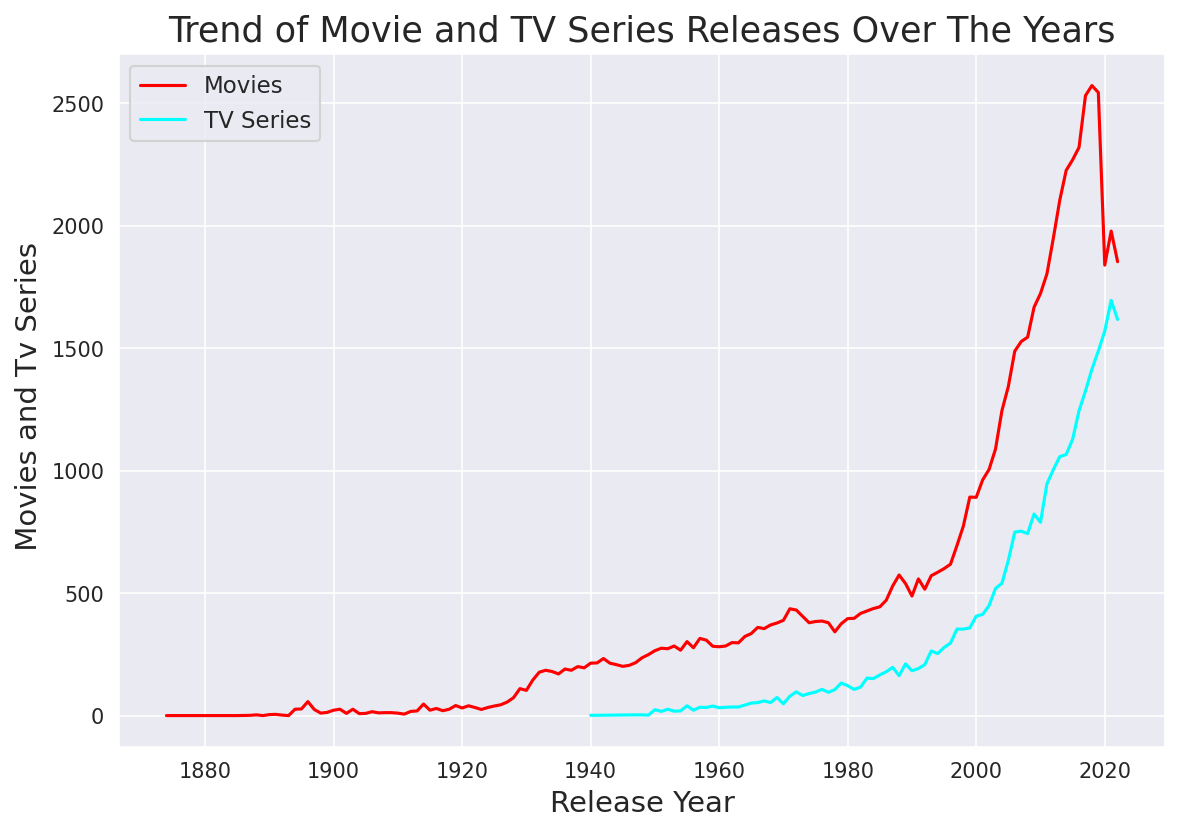

In [27]:
release_df = df.groupby(['releaseYear', 'contentType'], as_index=False)['dataId'].count()
release_df = release_df[(release_df['releaseYear'].isin ([-1, 2023]) ==False)]


my_palette = {'movie': 'red', 'tvSeries': 'cyan'}
ax = sns.lineplot(x = 'releaseYear', y ='dataId', data = release_df, hue = 'contentType', palette = my_palette)

handles, labels = ax.get_legend_handles_labels()
new_labels = ['Movies', 'TV Series']

ax.set_xlabel('Release Year')
ax.set_ylabel(' Movies and Tv Series')
ax.legend(handles, new_labels, fontsize = 11);
ax.set_title('Trend of Movie and TV Series Releases Over The Years');

Movie releases per year averaged a 29% growth and TV series a 18% growth. However, there is significance drop of movie releases after 2019. This is due to the COVID-19 pandemic. The COVID-19 pandemic had a significant impact on the film industry, with many movie theaters closing and film releases being delayed or moved to streaming platforms. On the other hand, the demand for TV series and other forms of home entertainment increased as people spent more time at home. This could be one reason why there were more TV series released than movies after 2019.

In 2019 the number of movies released globally was 2545, and in 2020 it dropped to 1840. On the other hand, there were 1489 TV series airing in 2019 and 1571 in 2020, according to this data

## Summary

In summary, this analysis explored the differences and similarities between movies and TV series in terms of genres, ratings, lengths, regions and releases. The main findings are:

* Movies and TV series share some common genres, such as comedy and drama, but also have some distinct preferences, such as action for movies and animation for TV series.
* The US is the largest producer of movies and TV series, followed by India and the UK. Some countries have more TV series than movies, such as South Korea and Japan, while others have more movies than TV series, such as India and France.
* TV series tend to have higher ratings than movies on IMDB, possibly because they have more opportunities to develop their characters and storylines and to explore more diverse and complex themes.
* The number of movie releases dropped significantly after 2019 due to the COVID-19 pandemic, while the number of TV series releases increased slightly. This suggests that the pandemic had a negative impact on the film industry but a positive impact on the TV industry.